In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import ExtraTreesRegressor

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Load the Data & statistical analysis
def load_data():
    train=pd.read_csv('Covid19India2.csv',index_col=0)
    
    print(train.shape)
    print(train.info())
    print(train.describe().T)
    return train

In [3]:
 def feature_engg(train):
    #Filling Missing Values
    print(train.isnull().sum())   
    
    train['Gender']=train['Gender'].fillna('No gender')
    train['Gender'].isnull().sum()

    train['Detected_City']=train['Detected_City'].fillna('Notmentioned')
    train['Detected_City'].isnull().sum()

    train['Detected_District']=train['Detected_District'].fillna('Notmentioned')
    train['Detected_District'].isnull().sum()

    train['Detected_State']=train['Detected_State'].fillna('Not')
    train['Detected_State'].isnull().sum()

    train['Current_Status']=train['Current_Status'].fillna('No')
    train['Current_Status'].isnull().sum()


    train['Age_Bracket']=train['Age_Bracket'].fillna(0)

    train['Num_Cases'] = train['Num_Cases'].fillna(0)
    train['Day'] = train['Day'].fillna(0)

    train['Month'] = train['Month'].fillna(0)
    train['Year'] = train['Year'].fillna(0)

    train['No'] = train['No'].fillna(0)

#Categorical Features
    cat_features=train.select_dtypes(include='object').columns
    print("Categorical Features:\n",cat_features,"\n No of categorical features:",len(cat_features))
    #Converting Categorical-Numeric features using Label Encoding
    le=LabelEncoder()
    for feature in cat_features:
        train[feature]=le.fit_transform(train[feature])
    
    return train

# Model building

In [4]:
def construct_model(train):
    y = train["Current_Status"]
    x = train.drop('Current_Status',axis=1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    
          
    dtree = tree.DecisionTreeClassifier(random_state=6)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    print (y_pred)
    print ("Decision Tree Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


In [5]:

df=load_data()
df.head()

(259824, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 259824 entries, 0 to 259823
Data columns (total 11 columns):
No                   259824 non-null int64
Num_Cases            259821 non-null float64
Age_Bracket          122699 non-null float64
Gender               125723 non-null object
Detected_City        14809 non-null object
Detected_District    250231 non-null object
Detected_State       259815 non-null object
Current_Status       259822 non-null object
Day                  259824 non-null int64
Month                259824 non-null int64
Year                 259824 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 23.8+ MB
None
                count          mean          std     min     25%     50%  \
No           259824.0  10493.953707  6404.413394     0.0  4996.0  9993.0   
Num_Cases    259821.0      9.871612   139.241378 -6368.0     1.0     1.0   
Age_Bracket  122699.0     38.264442    16.876176     0.0    26.0    36.0   
Day          259824.0  

,No,Num_Cases,Age_Bracket,Gender,Detected_City,Detected_District,Detected_State,Current_Status,Day,Month,Year
0,0,1.0,20.0,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


In [6]:
df=load_data()
df=feature_engg(df)

(259824, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 259824 entries, 0 to 259823
Data columns (total 11 columns):
No                   259824 non-null int64
Num_Cases            259821 non-null float64
Age_Bracket          122699 non-null float64
Gender               125723 non-null object
Detected_City        14809 non-null object
Detected_District    250231 non-null object
Detected_State       259815 non-null object
Current_Status       259822 non-null object
Day                  259824 non-null int64
Month                259824 non-null int64
Year                 259824 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 23.8+ MB
None
                count          mean          std     min     25%     50%  \
No           259824.0  10493.953707  6404.413394     0.0  4996.0  9993.0   
Num_Cases    259821.0      9.871612   139.241378 -6368.0     1.0     1.0   
Age_Bracket  122699.0     38.264442    16.876176     0.0    26.0    36.0   
Day          259824.0  

In [7]:

#To check feature importances
y = df["Current_Status"]
x = df.drop('Current_Status',axis=1)
model=ExtraTreesRegressor()
model.fit(x,y)
model.feature_importances_

array([0.18421721, 0.11853055, 0.03050429, 0.22173494, 0.00153282,
       0.09634214, 0.18600238, 0.05231071, 0.10882497, 0.        ])

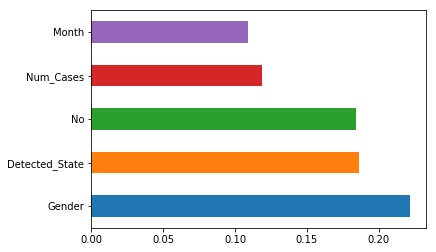

In [9]:

df_feat=pd.Series(model.feature_importances_,index=x.columns)
df_feat.nlargest(5).plot(kind='barh')

In [10]:
lr=construct_model(df)

(207859, 10) (207859,) (51965, 10) (51965,)
[1 1 1 ... 1 1 1]
Decision Tree Accuracy:  0.9535456557298182
[[ 1572   219     1     2     0     1   169]
 [  218 37481     0     4     0     1   801]
 [    0     0     0     0     0     0     0]
 [    2     4     0     7     0     0     3]
 [    1     0     0     0     4     0     0]
 [    0     0     0     0     0     0     0]
 [  119   867     0     2     0     0 10487]]
             precision    recall  f1-score   support

          0       0.82      0.80      0.81      1964
          1       0.97      0.97      0.97     38505
          2       0.00      0.00      0.00         0
          3       0.47      0.44      0.45        16
          4       1.00      0.80      0.89         5
          5       0.00      0.00      0.00         0
          6       0.92      0.91      0.91     11475

avg / total       0.95      0.95      0.95     51965



C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [12]:
import pickle
file=open("covid19.pkl","wb")
pickle.dump(lr,file)